In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Basic plotting: sine and cosine
Plot a sine and a cosine function, adding a legend for each. Choose non-default colors and make the lines thicker.

Put appropiate x- and y- labels, and also a title.

Text(0.5, 1.0, 'Sine and cosine')

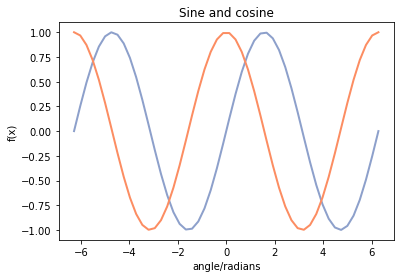

In [6]:
### Data
x_angles = np.linspace(-2*np.pi,2*np.pi,50)
y_sin = np.sin(x_angles)
y_cos = np.cos(x_angles)

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x_angles,y_sin,color="#8da0cb",label="sin",linewidth=2)
ax.plot(x_angles,y_cos,color="#fc8d62",label="cos",linewidth=2)

ax.set_xlabel("angle/radians")
ax.set_ylabel("f(x)")
ax.set_title("Sine and cosine")

### Basic plotting: linear regression
Plot the linear regression from the previous lesson, including the points (as a scatterplot) and the trend line (as a line plot).

*Hint*. If we have a equation (in this case, y=mx+n) we want to plot together with some data points, it is advisable to sample enough *x* points in the same range as the points (using `np.linspace` with the correct range), and then employ the equation to compute *y*.

Text(0.5, 1.0, 'Linear regression')

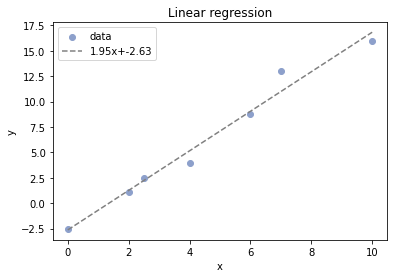

In [13]:
### Data
x_points = np.array([0,2,2.5,4,6,7,10])
y_points = np.array([-2.5,1.1,2.5,4,8.8,13,16])

m = 1.9453
n = -2.6254

x_sample = np.linspace(0,10,50)
y_pred = m*x_sample + n

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x_points,y_points,color="#8da0cb",label="data")
ax.plot(x_sample,y_pred,color="grey",linestyle="--",label="{:.2f}x+{:.2f}".format(m,n))
ax.legend()

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Linear regression")

### Basic plotting: layout
Create a 2x1 layout, and plot the sine/cosine from the first exercise on the left, and the linear regression from the second on the right.

Text(0.5, 1.0, 'Linear regression')

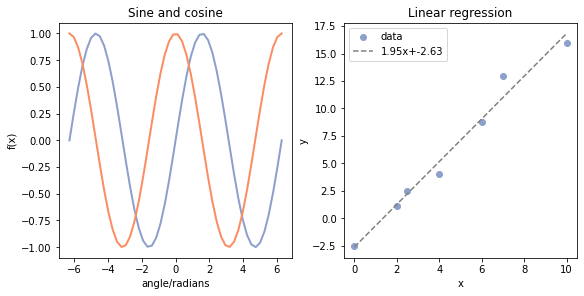

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4),constrained_layout=True)

axes[0].plot(x_angles,y_sin,color="#8da0cb",label="sin",linewidth=2)
axes[0].plot(x_angles,y_cos,color="#fc8d62",label="cos",linewidth=2)

axes[0].set_xlabel("angle/radians")
axes[0].set_ylabel("f(x)")
axes[0].set_title("Sine and cosine")

axes[1].scatter(x_points,y_points,color="#8da0cb",label="data")
axes[1].plot(x_sample,y_pred,color="grey",linestyle="--",label="{:.2f}x+{:.2f}".format(m,n))
axes[1].legend()

axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_title("Linear regression")



### Data plotting: gender heatmap
Build a similar visualization, but replacing the continent breakdown by a gender breakdown.

<AxesSubplot: xlabel='gender', ylabel='awardDecade'>

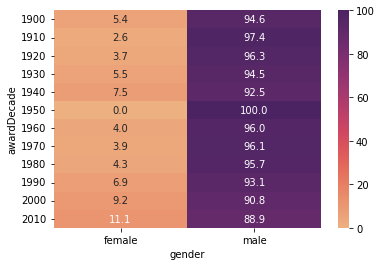

In [29]:
nobel = pd.read_csv("datasets/nobel-complete.csv")
def get_decade(year):
    return int(year/10)*10
nobel.loc[:,"awardDecade"] = nobel.loc[:,"awardYear"].apply(get_decade)
sel_nobel = nobel.loc[:,["awardYear","gender","birth_continent","category","awardDecade"]].dropna()

tab = pd.crosstab(sel_nobel.loc[:,"awardDecade"],sel_nobel.loc[:,"gender"])

counts = tab.sum(axis="columns")
tab2 = tab.div(counts,axis="rows")*100

sns.heatmap(data=tab2,annot=True,fmt=".1f",cmap="flare")

### Visualization: application example
From a table of experimental yields with different substituents (R1, R2 and R3) at three different temperatures (20º, 45º and 80ºC), build the corresponding heatmap. The data is `datasets/exp_data_example.dat`.
1. Read the DataFrame and look at it.
2. Reorganize the data, to have a matrix of temperature vs. substituent, where every point is a yield. To do this, use the `pd.pivot_table` function, with yield as the value field.
3. Generate the visualization and save it to a PNG file.


,subst,temp,yield
0,R1,20,30
1,R1,45,68
2,R1,80,99
3,R2,20,3
4,R2,45,41
5,R2,80,75
6,R3,20,70
7,R3,45,99
8,R3,80,99


subst,R1,R2,R3
temp,,,
20,30,3,70
45,68,41,99
80,99,75,99


Text(0.5, 1.0, 'Experimental yields')

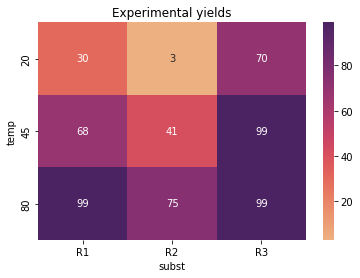

In [35]:
exp_data = pd.read_csv("datasets/exp_data_example.dat")
display(exp_data)

tab3 = pd.pivot_table(data=exp_data,index="temp",columns="subst",values="yield")
display(tab3)

ax = sns.heatmap(tab3,annot=True,fmt="d",cmap="flare")
ax.set_title("Experimental yields")